In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Constants

In [2]:
first_cols = ['cardNum', 'boarding_datetime','gps_datetime','route','busCode','stopPointId']
boarding_key_cols = ['cardNum','boarding_datetime']
gps_key_cols = ['route','busCode','tripNum','stopPointId']
max_match_diff = 1500

### Code

#### Reading Boarding data

In [43]:
boarding_data = pd.read_csv('/local/tarciso/masters/data/bus_trips/test/doc1-2017_05_10.csv')

In [44]:
boarding_data.head()

,CODLINHA,NOMELINHA,CODVEICULO,NUMEROCARTAO,HORAUTILIZACAO,DATAUTILIZACAO,DATANASCIMENTO,SEXO
0,000,OPER S/LINHA,00070,1353891,11:05:57,09/05/17,22/11/58,M
1,542,BAIRRO NOVO B,GA117,2357837,17:25:14,09/05/17,23/03/72,F
2,000,OPER S/LINHA,09053,2357837,17:57:33,09/05/17,23/03/72,F
3,000,OPER S/LINHA,09053,2357837,17:57:28,09/05/17,23/03/72,F
4,021,INTERB II ANTI H,08046,1937533,20:17:34,09/05/17,26/01/72,F


In [46]:
boarding_data.dtypes

CODLINHA                     object
NOMELINHA                    object
CODVEICULO                   object
NUMEROCARTAO                  int64
HORAUTILIZACAO               object
DATAUTILIZACAO               object
DATANASCIMENTO               object
SEXO                         object
boarding_datetime    datetime64[ns]
dtype: object

In [95]:
len(boarding_data)

320292

#### Adding datetime column to ticketing dataframe 

In [45]:
boarding_data['boarding_datetime'] = pd.to_datetime(boarding_data['DATAUTILIZACAO'] + ' ' + boarding_data['HORAUTILIZACAO'],format='%d/%m/%y %H:%M:%S')

#### Reading BUSTE data

In [3]:
buste_data = pd.read_csv('/local/tarciso/masters/data/bus_trips/test/part-00000-buste-latest', dtype = {'route': str}, na_values='-')

In [4]:
buste_data.head()

,route,tripNum,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,...,distanceToShapePoint,timestamp,stopPointId,problem,birthdate,cardTimestamp,lineName,cardNum,gender,date
0,372,4.0,1891,6136674,-25.418008,-49.201094,985.183,CC170,NaN,NaN,...,NaN,12:00:03,30778,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
1,372,4.0,1891,6136668,-25.416008,-49.202063,743.173,CC170,NaN,NaN,...,NaN,12:00:52,30767,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
2,372,4.0,1891,6136658,-25.413175,-49.203970,326.247,CC170,NaN,NaN,...,NaN,12:02:16,30760,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
3,372,4.0,1891,6136644,-25.412986,-49.205264,0.000,CC170,NaN,-25.413055,...,11.568364,12:03:22,26210,NO_PROBLEM,NaN,NaN,NaN,NaN,NaN,2017_05_09
4,372,5.0,1891,6136658,-25.413175,-49.203970,326.247,CC170,NaN,-25.413151,...,24.480747,12:04:49,30760,NO_PROBLEM,NaN,NaN,NaN,NaN,NaN,2017_05_09


In [5]:
buste_data.dtypes

route                     object
tripNum                  float64
shapeId                    int64
shapeSequence              int64
shapeLat                 float64
shapeLon                 float64
distanceTraveledShape    float64
busCode                   object
gpsPointId               float64
gpsLat                   float64
gpsLon                   float64
distanceToShapePoint     float64
timestamp                 object
stopPointId                int64
problem                   object
birthdate                 object
cardTimestamp             object
lineName                  object
cardNum                  float64
gender                    object
date                      object
dtype: object

#### Add date and datetime to gps dataframe

In [6]:
buste_data['gps_datetime'] = pd.to_datetime(buste_data['date'] + ' ' + buste_data['timestamp'],format='%Y_%m_%d %H:%M:%S')
buste_data['boarding_datetime'] = pd.to_datetime(buste_data['date'] + ' ' + buste_data['cardTimestamp'],format='%Y_%m_%d %H:%M:%S')

In [7]:
buste_data[['date','gps_datetime','boarding_datetime']]

,date,gps_datetime,boarding_datetime
0,2017_05_09,2017-05-09 12:00:03,NaT
1,2017_05_09,2017-05-09 12:00:52,NaT
2,2017_05_09,2017-05-09 12:02:16,NaT
3,2017_05_09,2017-05-09 12:03:22,NaT
4,2017_05_09,2017-05-09 12:04:49,NaT
5,2017_05_09,2017-05-09 12:05:40,NaT
6,2017_05_09,2017-05-09 12:06:23,NaT
7,2017_05_09,2017-05-09 12:06:46,NaT
8,2017_05_09,2017-05-09 12:07:36,2017-05-09 12:08:28
9,2017_05_09,2017-05-09 12:09:23,NaT


In [8]:
other_cols = [col for col in buste_data.columns if col not in first_cols]
cols_order = first_cols + other_cols
gps_by_boarding = buste_data[cols_order] \
    .sort_values(boarding_key_cols)
gps_by_boarding.head(10)

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLat,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-25.498735,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-25.501313,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-25.450986,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-25.428210,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-25.428125,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09
376450,304627.0,2017-05-09 16:24:40,2017-05-09 15:45:37,370,LC020,30303,6.0,2789,5510843,-25.455839,...,-25.455803,-49.323013,5.475631,15:45:37,NO_PROBLEM,05/04/53,16:24:40,RUA XV / BARIGUI,F,2017_05_09
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-25.446305,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-25.455618,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-25.431573,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09


In [9]:
len(gps_by_boarding)

642639

#### Filtering out BUSTE entries whose GPS-Ticketing match time difference is higher than 30 minutes

In [10]:
gps_by_boarding['match_diff'] = (gps_by_boarding['boarding_datetime'] - gps_by_boarding['gps_datetime']).astype('timedelta64[s]')

In [11]:
gps_by_boarding_filtered = gps_by_boarding[np.abs(gps_by_boarding['match_diff']) <= max_match_diff]
gps_by_boarding_filtered

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09,74.0
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09,1.0
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09,6.0
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09,83.0
285119,312823.0,2017-05-09 13:35:49,2017-05-09 13:34:57,652,LA001,34977,13.0,2101,3834325,-25.534607,...,-49.331276,14.430964,13:34:57,NO_PROBLEM,03/09/88,13:35:49,V. VERDE,F,2017_05_09,52.0


In [12]:
print gps_by_boarding_filtered['match_diff'].describe()

count    139531.000000
mean         83.926755
std         163.364311
min       -1313.000000
25%          17.000000
50%          48.000000
75%          69.000000
max        1499.000000
Name: match_diff, dtype: float64


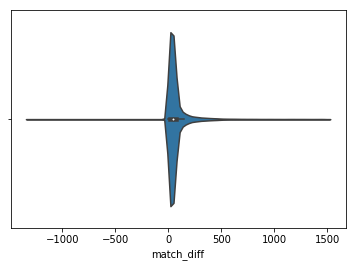

In [13]:
sns.violinplot(x='match_diff', data=gps_by_boarding_filtered[(gps_by_boarding_filtered['match_diff'] > -max_match_diff) & (gps_by_boarding_filtered['match_diff'] < max_match_diff)])

In [14]:
num_single_boardings = len(gps_by_boarding.drop_duplicates(subset=boarding_key_cols))
num_matched_boardings = len(gps_by_boarding_filtered)
num_missed_boardings = num_single_boardings - num_matched_boardings
perc_matched_boardings = num_matched_boardings/float(num_single_boardings)
perc_missed_boardings = num_missed_boardings/float(num_single_boardings)
print "single boardings: {}, matched boardings: {} ({}), missed boardings = {} ({})".format(num_single_boardings, num_matched_boardings, perc_matched_boardings, num_missed_boardings, perc_missed_boardings)

single boardings: 144669, matched boardings: 139531 (0.964484443799), missed boardings = 5138 (0.0355155562007)


In [15]:
trips_per_user = gps_by_boarding_filtered.groupby(['cardNum']).cardNum.count().reset_index(name='num_trips').num_trips.value_counts(normalize=True) \
                    .reset_index(name='num_trips', level=0)

In [16]:
trips_per_user

,index,num_trips
0,1,0.751818
1,2,0.208254
2,3,0.028545
3,4,0.009244
4,5,0.001270
5,6,0.000654
6,7,0.000112
7,8,0.000065
8,10,0.000019
9,9,0.000019


## Build final BUSTE dataset

#### Ticketing and GPS matches

In [17]:
gps_by_boarding_filtered.head()

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0


In [18]:
len(gps_by_boarding_filtered)

139531

In [19]:
len(gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['cardNum']) | pd.isnull(gps_by_boarding_filtered['boarding_datetime'])])

0

In [20]:
len(gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['route']) | 
             pd.isnull(gps_by_boarding_filtered['busCode']) |
             pd.isnull(gps_by_boarding_filtered['tripNum']) |
             pd.isnull(gps_by_boarding_filtered['stopPointId']) |
             pd.isnull(gps_by_boarding_filtered['gps_datetime'])])

0

In [21]:
gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['cardNum'])]

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff


#### GPS with no match / with filtered match

In [31]:
gps_with_no_match = gps_by_boarding[(np.abs(gps_by_boarding['match_diff']) > max_match_diff) | (pd.isnull(gps_by_boarding['match_diff']))]
gps_with_no_match.loc[:,['cardNum','boarding_datetime','birthdate','cardTimestamp','lineName','gender']] = np.nan

In [32]:
gps_with_no_match

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
376450,NaN,NaN,2017-05-09 15:45:37,370,LC020,30303,6.0,2789,5510843,-25.455839,...,-49.323013,5.475631,15:45:37,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2343.0
510050,NaN,NaN,2017-05-09 12:58:40,631,GA208,33278,8.0,3369,6595274,-25.512413,...,-49.289261,3.034185,12:58:40,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-26708.0
271115,NaN,NaN,2017-05-09 13:47:36,370,LC028,30304,5.0,2789,5510857,-25.458703,...,-49.323503,2.649607,13:47:36,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2200.0
391172,NaN,NaN,2017-05-09 12:59:59,040,HB605,34156,3.0,1718,3368987,-25.404344,...,-49.335390,10.035853,12:59:59,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-23867.0
128240,NaN,NaN,2017-05-09 06:51:17,021,HB604,28136,1.0,3235,5233298,-25.435866,...,-49.307076,20.858232,06:51:17,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,1726.0
542840,NaN,NaN,2017-05-09 07:55:32,010,BB310,33171,2.0,1708,5859650,-25.449428,...,-49.254205,8.176641,07:55:32,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2526.0
391175,NaN,NaN,2017-05-09 12:59:59,040,HB605,34156,3.0,1718,3368987,-25.404344,...,-49.335390,10.035853,12:59:59,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-25520.0
613942,NaN,NaN,2017-05-09 08:15:39,010,BB001,33171,3.0,1708,5859650,-25.449428,...,-49.254193,6.699659,08:15:39,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2518.0
613941,NaN,NaN,2017-05-09 08:15:39,010,BB001,33171,3.0,1708,5859650,-25.449428,...,-49.254193,6.699659,08:15:39,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2524.0
341510,NaN,NaN,2017-05-09 16:25:38,040,MB301,31029,8.0,1717,3367323,-25.513207,...,-49.295160,3.268860,16:25:38,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,3622.0


In [33]:
gps_with_no_match_clean = gps_with_no_match[
                (pd.notnull(gps_with_no_match['route']) & pd.notnull(gps_with_no_match['busCode'])) &
                (pd.notnull(gps_with_no_match['tripNum']) & pd.notnull(gps_with_no_match['stopPointId'])) &
                (pd.notnull(gps_with_no_match['gps_datetime']))] \
                    .drop_duplicates(subset=gps_key_cols)

In [35]:
print len(gps_with_no_match), len(gps_with_no_match_clean), len(gps_with_no_match) - len(gps_with_no_match_clean)

503108 471707 31401


### Building dataset with unique GPS-Ticketing matches and unique GPS records

In [38]:
unique_boarding_gps = pd.concat([gps_by_boarding_filtered,gps_with_no_match_clean])

In [39]:
len(unique_boarding_gps)

611238

In [40]:
unique_boarding_gps = unique_boarding_gps[~((unique_boarding_gps.duplicated(subset=gps_key_cols, keep=False)) & (pd.isnull(unique_boarding_gps['cardNum'])))] \
            .sort_values(boarding_key_cols + gps_key_cols[:-1] + ['gps_datetime'])

In [41]:
unique_boarding_gps

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09,74.0
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09,1.0
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09,6.0
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09,83.0
285119,312823.0,2017-05-09 13:35:49,2017-05-09 13:34:57,652,LA001,34977,13.0,2101,3834325,-25.534607,...,-49.331276,14.430964,13:34:57,NO_PROBLEM,03/09/88,13:35:49,V. VERDE,F,2017_05_09,52.0


In [42]:
len(unique_boarding_gps)

609960

#### Match station/terminal boarding registries with their respective stop codes

#### Read Terminal/Station Boarding Codes translation table

In [58]:
terminal_codes = pd.read_csv('/local/tarciso/masters/data/urbs/line-000-terminals-translation-table.csv', dtype = {'URBS_CODE': str})

In [59]:
terminal_codes.head()

,LINE,NAME,URBS_CODE,STOP_ID,LAT,LON
0,000,TERMINAL BOQUEIRÃO,00001,14489,-25.516723,-49.230568
1,000,TERMINAL BOQUEIRÃO,00002,14489,-25.516723,-49.230568
2,000,TERMINAL BOQUEIRÃO,00003,14489,-25.516723,-49.230568
3,000,TERMINAL CARMO,00004,14485,-25.501311,-49.237825
4,000,TERMINAL CARMO,00005,14485,-25.501311,-49.237825


#### Match CODVEICULO to URBS_CODE to find line 000 boarding stations

In [60]:
matched_station_boarding = boarding_data.merge(terminal_codes, left_on='CODVEICULO', right_on='URBS_CODE', how='inner') \
                        .sort_values(by='DATAUTILIZACAO')

In [61]:
matched_station_boarding.head(100)

,CODLINHA,NOMELINHA,CODVEICULO,NUMEROCARTAO,HORAUTILIZACAO,DATAUTILIZACAO,DATANASCIMENTO,SEXO,boarding_datetime,LINE,NAME,URBS_CODE,STOP_ID,LAT,LON
0,000,OPER S/LINHA,00070,1353891,11:05:57,09/05/17,22/11/58,M,2017-05-09 11:05:57,000,TERMINAL HAUER,00070,14487,-25.481900,-49.247078
96169,000,OPER S/LINHA,07001,2267326,15:38:38,09/05/17,17/05/58,F,2017-05-09 15:38:38,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96168,000,OPER S/LINHA,07001,2267326,10:10:22,09/05/17,17/05/58,F,2017-05-09 10:10:22,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96167,000,OPER S/LINHA,07001,3409250,12:49:21,09/05/17,01/04/96,M,2017-05-09 12:49:21,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96166,000,OPER S/LINHA,07001,3248165,17:41:28,09/05/17,25/11/64,F,2017-05-09 17:41:28,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96165,000,OPER S/LINHA,07001,3241537,14:23:49,09/05/17,10/09/70,F,2017-05-09 14:23:49,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96164,000,OPER S/LINHA,07001,3249406,13:26:51,09/05/17,18/01/97,F,2017-05-09 13:26:51,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96163,000,OPER S/LINHA,07001,3835428,08:29:26,09/05/17,07/12/70,F,2017-05-09 08:29:26,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96162,000,OPER S/LINHA,07001,3819884,18:28:53,09/05/17,28/08/02,M,2017-05-09 18:28:53,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734
96161,000,OPER S/LINHA,07001,10106122,15:56:13,09/05/17,NaN,NaN,2017-05-09 15:56:13,000,TUBO DE INTEGRAÇÃO-TERMINAL SANTA FELICIDADE,07001,14510,-25.401281,-49.329734


In [62]:
num_matched_stations = len(matched_station_boarding)

In [63]:
total_station_boarding = len(boarding_data[boarding_data.CODVEICULO.str.isnumeric()])
print num_matched_stations, total_station_boarding, num_matched_stations/float(total_station_boarding)

144241 151487 0.952167512724


In [65]:
matched_station_boarding.groupby('CODLINHA').CODLINHA.count()

CODLINHA
000    122864
021      7653
TCA       595
TCJ      1386
TCR      1061
TFA       854
TFZ       636
TMA       767
TPH      3614
TSB      1262
TSF       823
TSP       726
TSQ      1510
TXA       490
Name: CODLINHA, dtype: int64

#### Formatting stations boarding data to fit BUSTE data format

In [67]:
terminal_boardings = matched_station_boarding.drop(['LINE','NAME','URBS_CODE','LAT','LON','boarding_datetime','DATAUTILIZACAO'], axis=1) \
                        .rename(index=str, columns={'CODLINHA': 'route', 'CODVEICULO': 'busCode', 
                                                    'DATANASCIMENTO':'birthdate','HORAUTILIZACAO':'cardTimestamp',
                                                    'NOMELINHA':'lineName','NUMEROCARTAO':'cardNum',
                                                     'SEXO':'gender','STOP_ID':'stopPointId'})

In [68]:
terminal_boardings.head()

,route,lineName,busCode,cardNum,cardTimestamp,birthdate,gender,stopPointId
0,000,OPER S/LINHA,00070,1353891,11:05:57,22/11/58,M,14487
96169,000,OPER S/LINHA,07001,2267326,15:38:38,17/05/58,F,14510
96168,000,OPER S/LINHA,07001,2267326,10:10:22,17/05/58,F,14510
96167,000,OPER S/LINHA,07001,3409250,12:49:21,01/04/96,M,14510
96166,000,OPER S/LINHA,07001,3248165,17:41:28,25/11/64,F,14510


In [69]:
unique_boarding_gps.columns

Index([u'cardNum', u'boarding_datetime', u'gps_datetime', u'route', u'busCode',
       u'stopPointId', u'tripNum', u'shapeId', u'shapeSequence', u'shapeLat',
       u'shapeLon', u'distanceTraveledShape', u'gpsPointId', u'gpsLat',
       u'gpsLon', u'distanceToShapePoint', u'timestamp', u'problem',
       u'birthdate', u'cardTimestamp', u'lineName', u'gender', u'date',
       u'match_diff'],
      dtype='object')

In [106]:
gps_boardings_with_terminals = pd.concat([unique_boarding_gps,terminal_boardings], ignore_index=True)

In [107]:
gps_boardings_with_terminals.columns

Index([u'birthdate', u'boarding_datetime', u'busCode', u'cardNum',
       u'cardTimestamp', u'date', u'distanceToShapePoint',
       u'distanceTraveledShape', u'gender', u'gpsLat', u'gpsLon',
       u'gpsPointId', u'gps_datetime', u'lineName', u'match_diff', u'problem',
       u'route', u'shapeId', u'shapeLat', u'shapeLon', u'shapeSequence',
       u'stopPointId', u'timestamp', u'tripNum'],
      dtype='object')

In [108]:
gps_boardings_with_terminals = gps_boardings_with_terminals[['route','busCode','tripNum','stopPointId','cardNum','cardTimestamp','gps_datetime',
                                      'shapeId','shapeSequence','shapeLat','shapeLon','distanceTraveledShape','gpsPointId',
                                      'gpsLat','gpsLon','distanceToShapePoint','timestamp','problem','lineName','birthdate',
                                        'gender','date']] \
                            .sort_values(['cardNum','cardTimestamp'])

In [109]:
gps_boardings_with_terminals.head()

,route,busCode,tripNum,stopPointId,cardNum,cardTimestamp,gps_datetime,shapeId,shapeSequence,shapeLat,...,gpsPointId,gpsLat,gpsLon,distanceToShapePoint,timestamp,problem,lineName,birthdate,gender,date
654382,000,08024,NaN,41752,228696.0,07:01:00,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,27/04/94,F,NaN
0,654,HA017,2.0,35350,229948.0,06:29:09,2017-05-09 06:28:49,2953.0,3848651.0,-25.492612,...,NaN,NaN,NaN,NaN,06:28:49,BETWEEN,CAMPO ALEGRE,28/04/95,F,2017_05_09
696983,000,01026,NaN,41863,233641.0,06:39:21,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,20/09/96,F,NaN
666201,021,04020,NaN,14508,233641.0,12:08:17,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,INTERB II ANTI H,20/09/96,F,NaN
1,511,EA172,4.0,31195,257342.0,07:48:58,2017-05-09 07:47:51,2746.0,5846156.0,-25.498727,...,NaN,-25.498735,-49.247771,9.667548,07:47:51,NO_PROBLEM,SÃO FRANCISCO,24/01/71,F,2017_05_09


### Add parent station ID to GPS Boardings data

#### Read GTFS stops file

In [110]:
stops_df = pd.read_csv('/local/tarciso/data/gtfs/curitiba/stops.txt')

In [111]:
stops_df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,70,104505,Terminal Campina do Siqueira - 303 - Centenári...,Terminal Campina do Siqueira - Campo Comprido,-25.435724,-49.306998,NaN,NaN,0,14506.0,NaN,NaN
1,270,104905,Terminal Carmo - 030 - Interbairros III,Terminal Carmo - 030 - Interbairros III (Senti...,-25.501341,-49.237597,NaN,NaN,0,14485.0,NaN,NaN
2,276,105606,Terminal Oficinas - 030 - Interbairros III,Terminal Oficinas - 030 - Interbairros III (Se...,-25.451550,-49.214917,NaN,NaN,0,14481.0,NaN,NaN
3,299,105603,Terminal Oficinas - 030 - Interbairros III,Terminal Oficinas - 030 - Interbairros III (Se...,-25.451665,-49.215086,NaN,NaN,0,14481.0,NaN,NaN
4,308,104907,Terminal Carmo - 030 - Interbairros III,Terminal Carmo - 030 - Interbairros III (Senti...,-25.501311,-49.237825,NaN,NaN,0,14485.0,NaN,NaN


In [112]:
stops_parent_stations = stops_df[['stop_id','parent_station']]

In [113]:
gps_boardings_with_parent_stations = gps_boardings_with_terminals.merge(stops_parent_stations, left_on='stopPointId', right_on='stop_id', how='left')

In [114]:
gps_boardings_with_parent_stations.head()

,route,busCode,tripNum,stopPointId,cardNum,cardTimestamp,gps_datetime,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,lineName,birthdate,gender,date,stop_id,parent_station
0,000,08024,NaN,41752,228696.0,07:01:00,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OPER S/LINHA,27/04/94,F,NaN,41752.0,NaN
1,654,HA017,2.0,35350,229948.0,06:29:09,2017-05-09 06:28:49,2953.0,3848651.0,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,CAMPO ALEGRE,28/04/95,F,2017_05_09,35350.0,NaN
2,000,01026,NaN,41863,233641.0,06:39:21,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OPER S/LINHA,20/09/96,F,NaN,41863.0,NaN
3,021,04020,NaN,14508,233641.0,12:08:17,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,INTERB II ANTI H,20/09/96,F,NaN,14508.0,NaN
4,511,EA172,4.0,31195,257342.0,07:48:58,2017-05-09 07:47:51,2746.0,5846156.0,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,SÃO FRANCISCO,24/01/71,F,2017_05_09,31195.0,NaN


In [115]:
len(gps_boardings_with_parent_stations)

754201

In [116]:
final_buste_result = gps_boardings_with_parent_stations[['route','busCode','tripNum','stopPointId','parent_station','cardNum','cardTimestamp','gps_datetime',
                                      'shapeId','shapeSequence','shapeLat','shapeLon','distanceTraveledShape','gpsPointId',
                                      'gpsLat','gpsLon','distanceToShapePoint','timestamp','problem','lineName','birthdate',
                                      'gender','date']] \
                            .sort_values(['cardNum','cardTimestamp'])

In [117]:
final_buste_result

,route,busCode,tripNum,stopPointId,parent_station,cardNum,cardTimestamp,gps_datetime,shapeId,shapeSequence,...,gpsPointId,gpsLat,gpsLon,distanceToShapePoint,timestamp,problem,lineName,birthdate,gender,date
0,000,08024,NaN,41752,NaN,228696.0,07:01:00,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,27/04/94,F,NaN
1,654,HA017,2.0,35350,NaN,229948.0,06:29:09,2017-05-09 06:28:49,2953.0,3848651.0,...,NaN,NaN,NaN,NaN,06:28:49,BETWEEN,CAMPO ALEGRE,28/04/95,F,2017_05_09
2,000,01026,NaN,41863,NaN,233641.0,06:39:21,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,20/09/96,F,NaN
3,021,04020,NaN,14508,NaN,233641.0,12:08:17,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,INTERB II ANTI H,20/09/96,F,NaN
4,511,EA172,4.0,31195,NaN,257342.0,07:48:58,2017-05-09 07:47:51,2746.0,5846156.0,...,NaN,-25.498735,-49.247771,9.667548,07:47:51,NO_PROBLEM,SÃO FRANCISCO,24/01/71,F,2017_05_09
5,000,01021,NaN,26037,NaN,257342.0,17:24:51,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,24/01/71,F,NaN
6,000,03047,NaN,14553,NaN,272904.0,17:24:52,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,17/09/74,F,NaN
7,654,HA240,3.0,36094,NaN,300327.0,06:56:45,2017-05-09 06:55:54,2106.0,6040871.0,...,NaN,-25.501313,-49.319971,0.737270,06:55:54,NO_PROBLEM,OP. CONTIGENCIA,20/05/59,F,2017_05_09
8,000,00038,NaN,26051,NaN,303661.0,17:43:10,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OPER S/LINHA,23/06/73,M,NaN
9,175,BC010,5.0,31748,NaN,304127.0,10:24:50,2017-05-09 10:22:28,1743.0,5444496.0,...,NaN,-25.450986,-49.254015,13.270845,10:22:28,NO_PROBLEM,BOM RETIRO / PUC,09/06/54,M,2017_05_09


#### Write BUSTE final dataset to file

In [118]:
final_buste_result.to_csv('/local/tarciso/masters/data/bus_trips/test/final_buste_dataset_05_09_2017.csv', index=False)

### Evaluate Final BUSTE Dataset

#### Evaluating Number of Trips per User in Final Dataset

In [82]:
trips_per_user = final_buste_result.groupby(['cardNum']).cardNum.count().reset_index(name='num_trips').num_trips.value_counts(normalize=True) \
                    .reset_index(name='num_trips', level=0)

In [83]:
trips_per_user

,index,num_trips
0,1,0.553889
1,2,0.333265
2,3,0.077171
3,4,0.026539
4,5,0.004954
5,6,0.003024
6,7,0.000494
7,8,0.000369
8,9,0.000176
9,10,0.000102


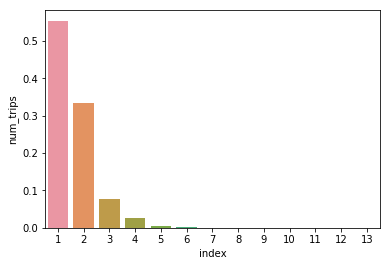

In [84]:
#sns.distplot(trips_per_user, hist=True)
#sns.violinplot(trips_per_user)
sns.barplot(x='index', y='num_trips', data=trips_per_user)

#### Compare with distribution of number of trips per user on a day on the original ticketing data

In [85]:
boarding_data.columns

Index([u'CODLINHA', u'NOMELINHA', u'CODVEICULO', u'NUMEROCARTAO',
       u'HORAUTILIZACAO', u'DATAUTILIZACAO', u'DATANASCIMENTO', u'SEXO',
       u'boarding_datetime'],
      dtype='object')

In [86]:
trips_per_user_original = boarding_data.groupby('NUMEROCARTAO').NUMEROCARTAO.count().reset_index(name='num_trips').num_trips.value_counts(normalize=True).reset_index(name='num_trips')

In [87]:
trips_per_user_original

,index,num_trips
0,1,0.500482
1,2,0.382923
2,3,0.078011
3,4,0.029663
4,5,0.004827
5,6,0.002977
6,7,0.000495
7,8,0.000396
8,9,0.000130
9,10,0.000094


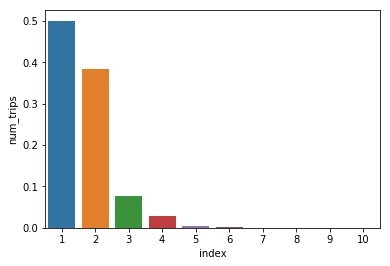

In [88]:
sns.barplot(x='index', y='num_trips', data=trips_per_user_original)

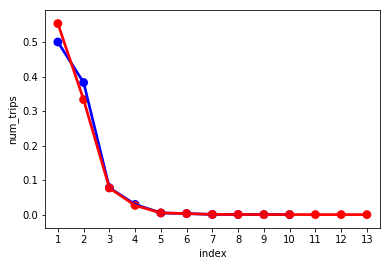

In [89]:
fig, ax = plt.subplots()
sns.pointplot(x='index', y='num_trips', data=trips_per_user_original, ax=ax, color='blue')
sns.pointplot(x='index', y='num_trips', data=trips_per_user, ax=ax, color='red')

#### Evaluate Missed Ticketing

In [91]:
missed_ticketing = pd.concat([final_buste_result[['cardNum','cardTimestamp','route','busCode']],
                              boarding_data[['NUMEROCARTAO','HORAUTILIZACAO','CODLINHA','CODVEICULO']] \
                                .rename(index=str, columns={'NUMEROCARTAO':'cardNum','HORAUTILIZACAO':'cardTimestamp',
                                                            'CODLINHA':'route','CODVEICULO':'busCode'})], axis=0) \
                    .drop_duplicates(subset=['cardNum','cardTimestamp'], keep=False)

In [92]:
missed_ticketing

,cardNum,cardTimestamp,route,busCode
16,1225547.0,18:10:41,684,HR417
19,2293790.0,17:46:39,040,JB605
27,3543165.0,17:54:09,OPC,HA295
36,1911991.0,15:23:48,000,06063
59,3752309.0,16:53:11,000,09032
63,3715544.0,15:12:37,050,JB602
82,2569091.0,05:40:47,242,BA115
88,3794425.0,08:04:10,000,05008
91,3184983.0,07:37:34,225,BA136
96,2977590.0,09:10:06,000,09035


In [93]:
missed_ticketing.describe(include='all')

,cardNum,cardTimestamp,route,busCode
count,4.360800e+04,43608,43608,43608
unique,NaN,27760,197,654
top,NaN,12:00:24,000,03010
freq,NaN,9,14243,1276
mean,2.996685e+06,NaN,NaN,NaN
std,1.126718e+06,NaN,NaN,NaN
min,2.286960e+05,NaN,NaN,NaN
25%,2.325180e+06,NaN,NaN,NaN
50%,3.229522e+06,NaN,NaN,NaN
75%,3.660669e+06,NaN,NaN,NaN


In [94]:
missed_ticketing.route.value_counts(normalize=True).head(10)

000    0.326614
OPC    0.138988
541    0.049028
684    0.021693
021    0.020959
050    0.018460
040    0.017313
816    0.016006
828    0.012108
523    0.011741
Name: route, dtype: float64